# Binary oversampling with metric learning based neighborhoods

This notebook presents the use of metric learning based neighborhoods for oversampling. The feature has been added to 69 oversampling techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
from smote_variants.visualization import plot_comparison_raw

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

import warnings
warnings.simplefilter('ignore')

2022-08-16 16:31:01.748697: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 16:31:01.753944: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 16:31:01.753961: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Generating a classification problem

Loading the usual 2-class illustration dataset.

In [2]:
dataset = sv.datasets.load_illustration_2_class()
X, y = dataset['data'], dataset['target']

## Noise removal with metric learning

We compare the effect of noise removal with and without learning the suitable metric.

In [3]:
noise_filters_metric= [sv.noise_removal.TomekLinkRemoval, 
                       sv.noise_removal.NeighborhoodCleaningRule, 
                       sv.noise_removal.EditedNearestNeighbors]

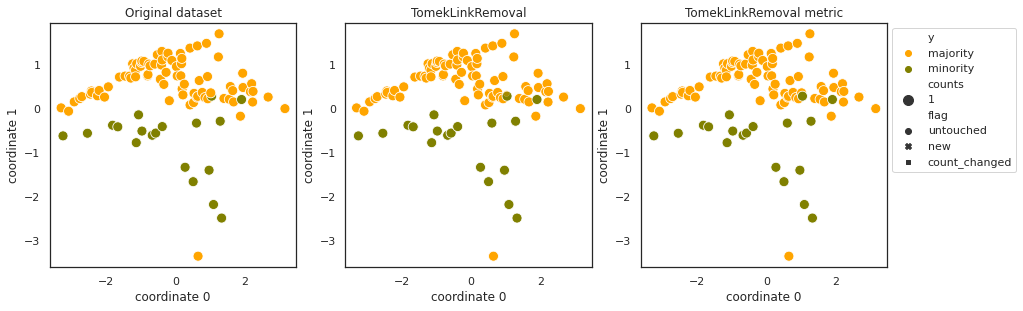

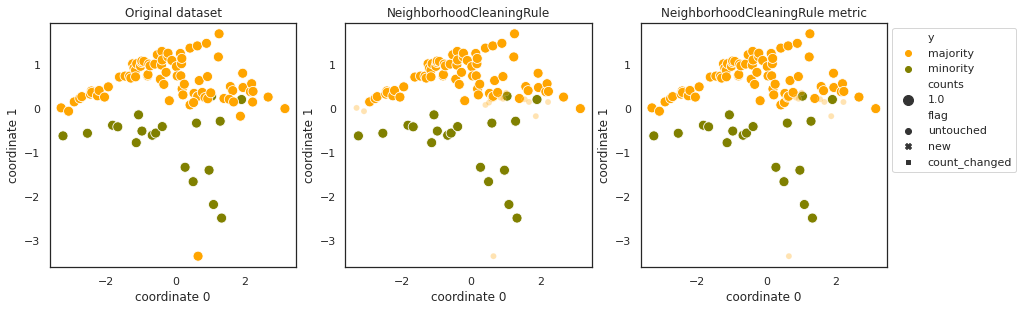

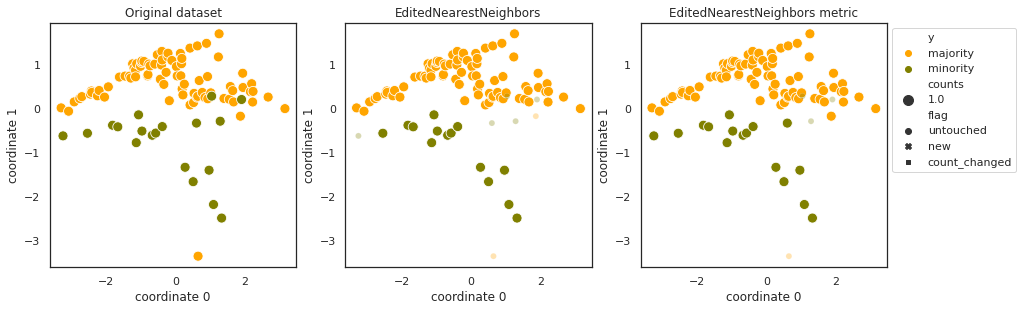

In [4]:
for nf in noise_filters_metric:
    nf_vanilla= nf()
    X_nf, y_nf= nf_vanilla.remove_noise(X, y)

    nf_metric= nf(nn_params={'metric': 'precomputed',
                             'metric_learning_method': 'ITML'})
    X_nf_metric, y_nf_metric= nf_metric.remove_noise(X, y)
    
    _ = plot_comparison_raw(X=X, y=y, 
                        X_samp0=X_nf, 
                        y_samp0=y_nf, 
                        X_samp1=X_nf_metric, 
                        y_samp1=y_nf_metric, 
                        title0=nf_vanilla.__class__.__name__, 
                        title1=nf_vanilla.__class__.__name__ + ' ' + 'metric')
    plt.show()

## Oversampling with metric learning

We compare the result of oversampling with and without metric learning.

In [5]:
oversamplers_metric= sv.get_metric_learning_oversamplers()

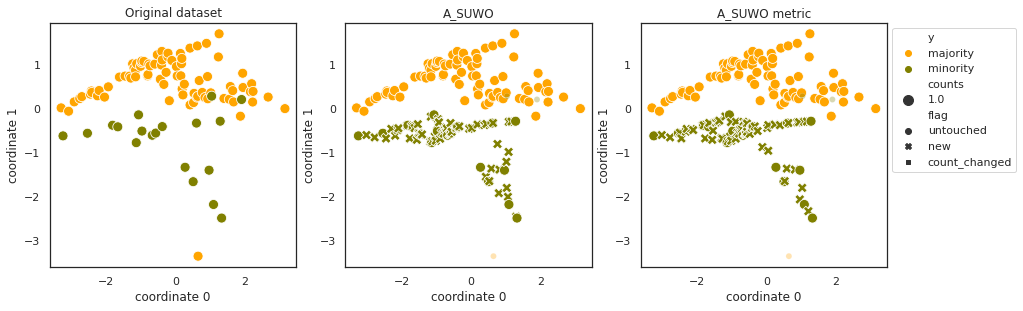

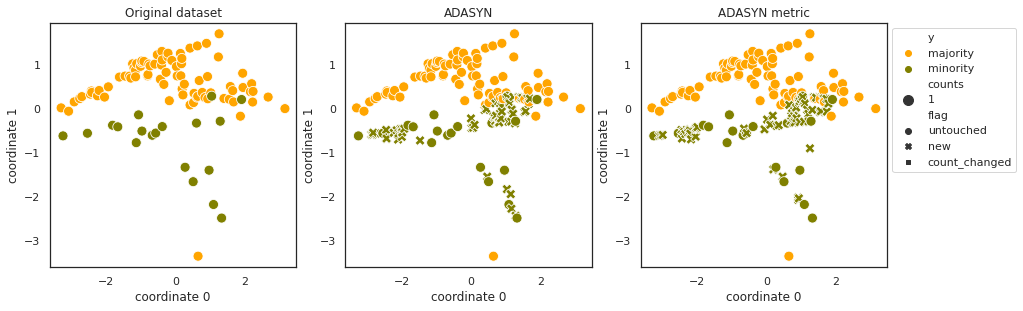

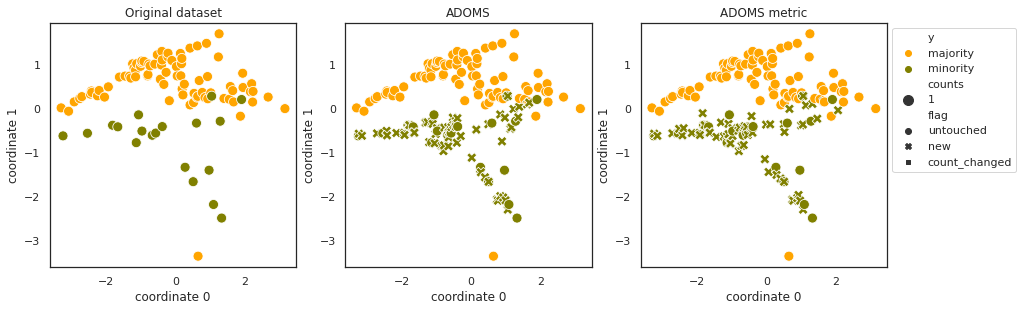

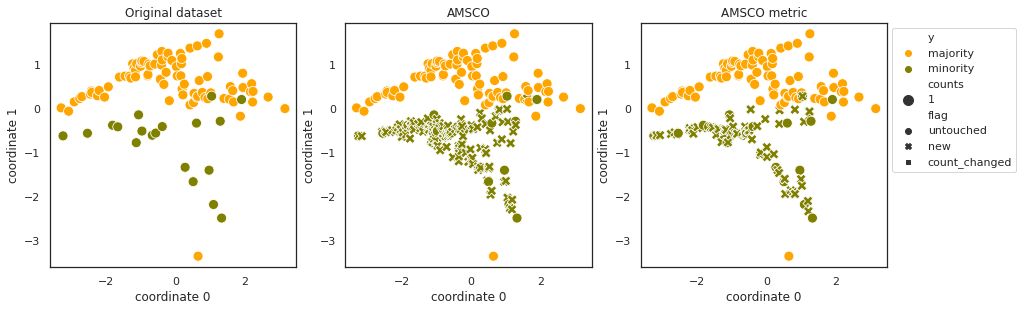

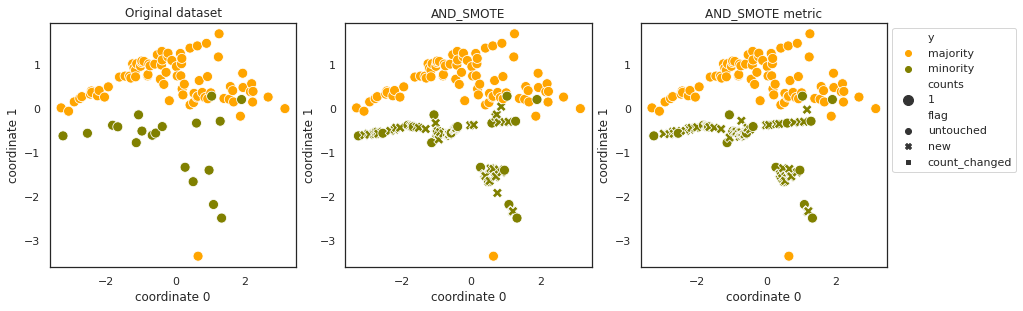

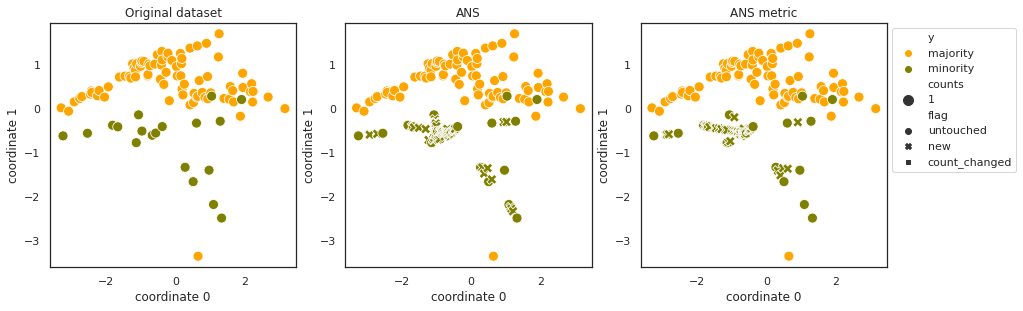

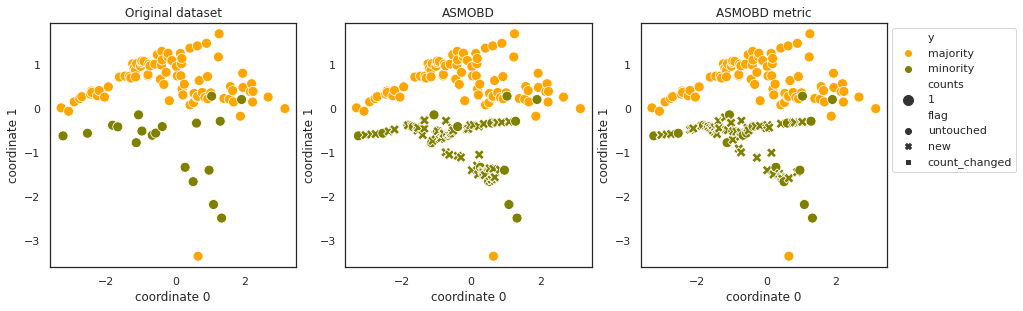

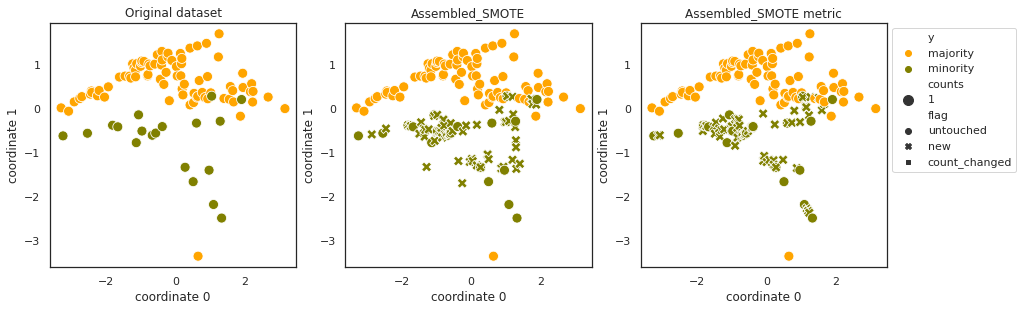

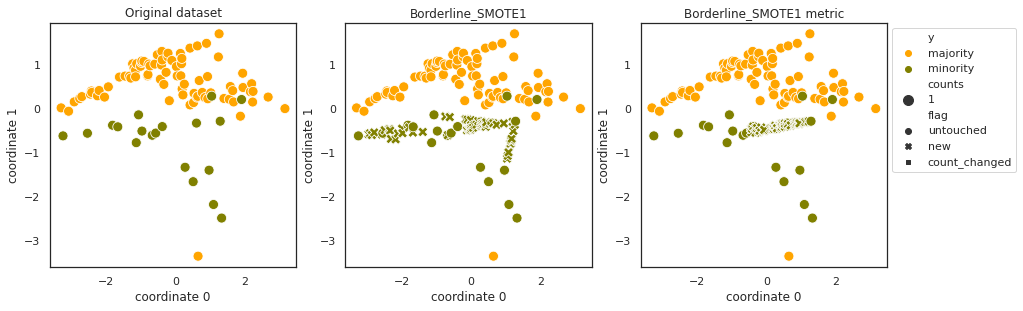

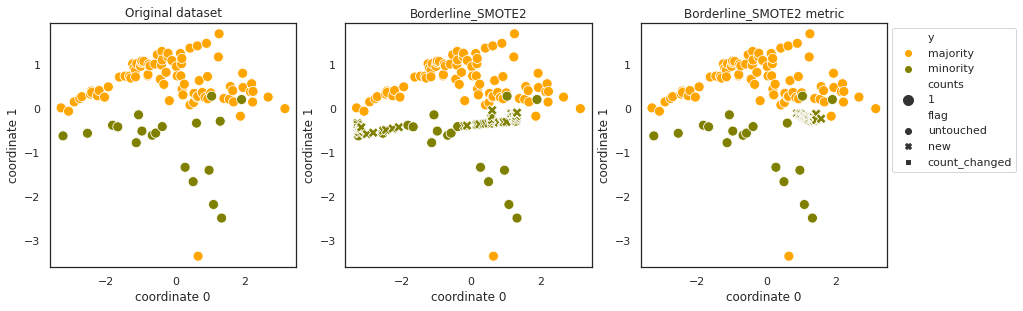

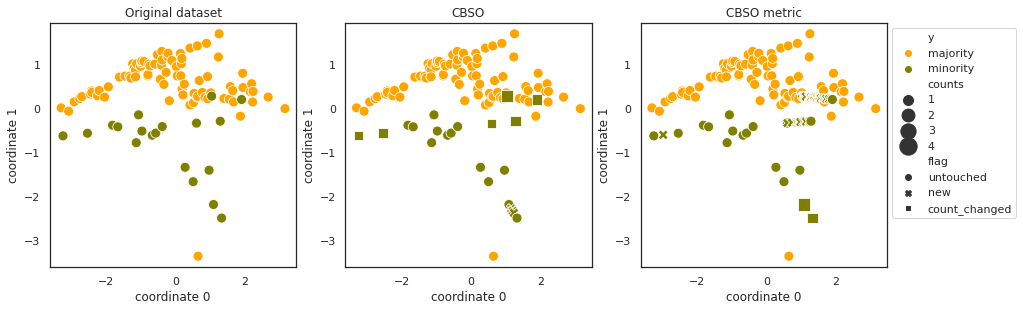

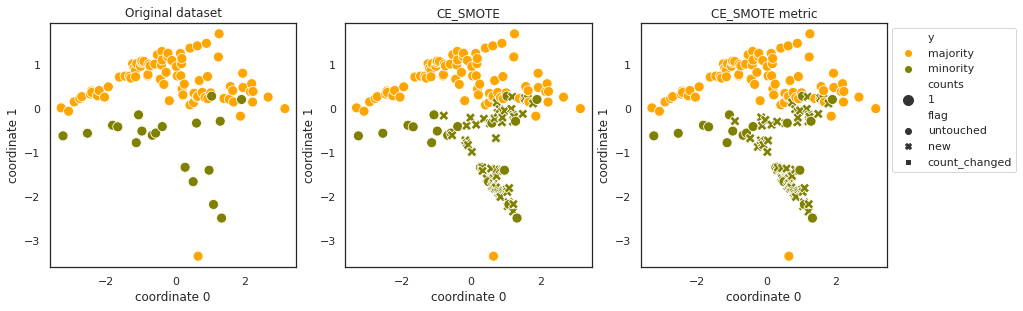

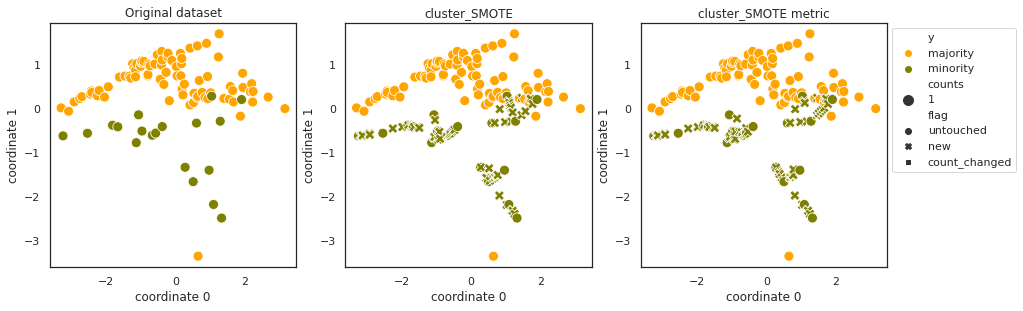

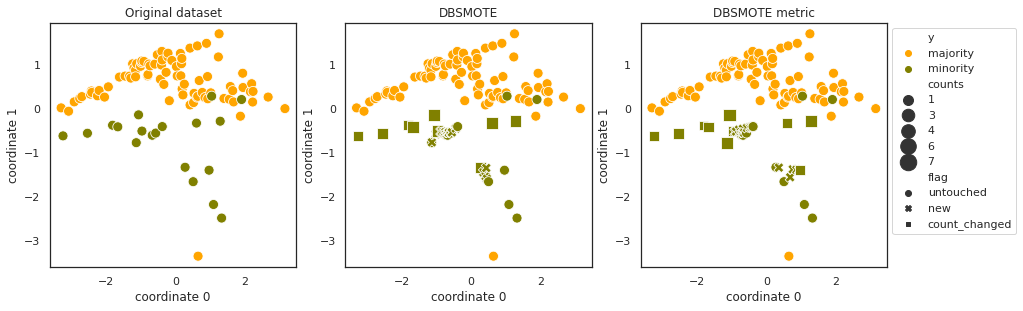

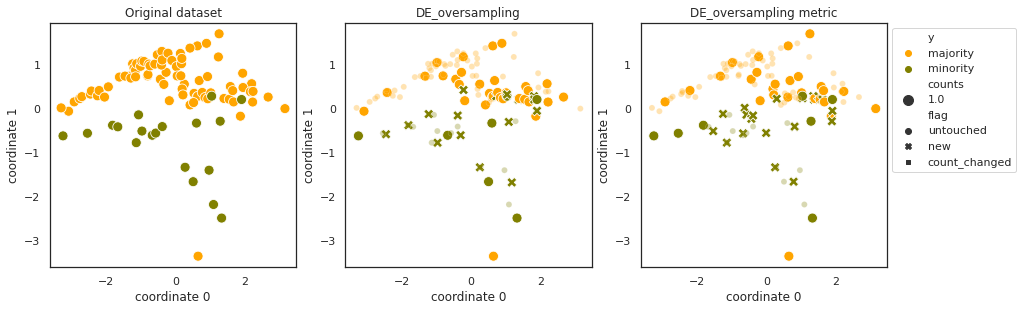

2022-08-16 16:31:42.032518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-16 16:31:42.032609: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-16 16:31:42.032719: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daa): /proc/driver/nvidia/version does not exist
2022-08-16 16:31:42.033694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 3ms/step


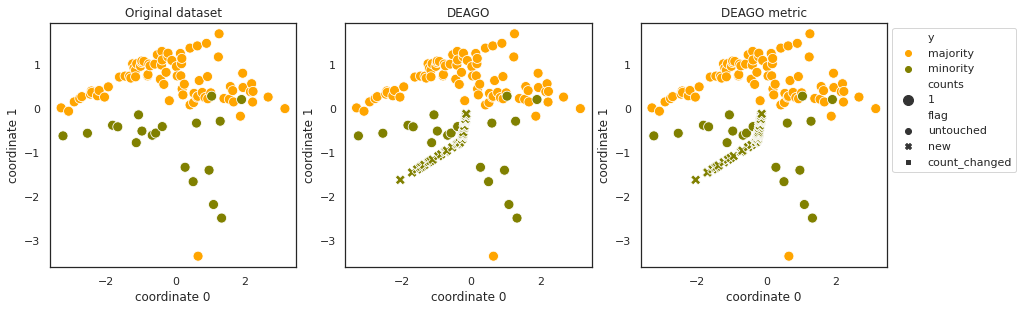

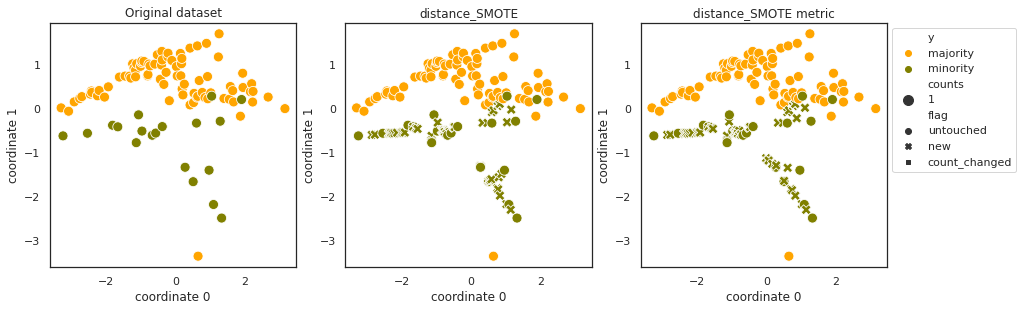

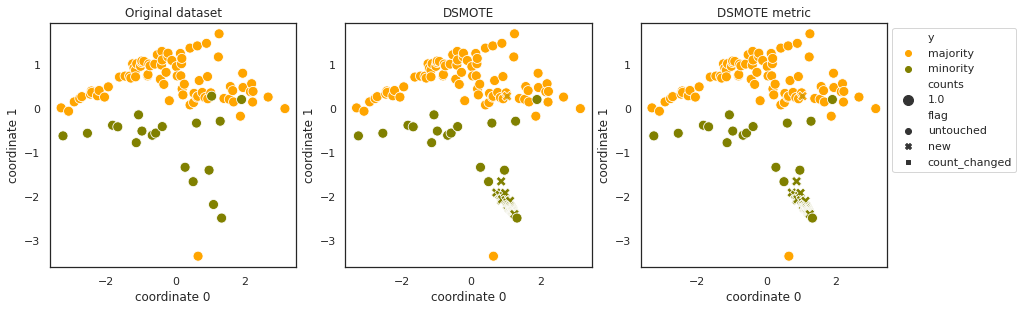

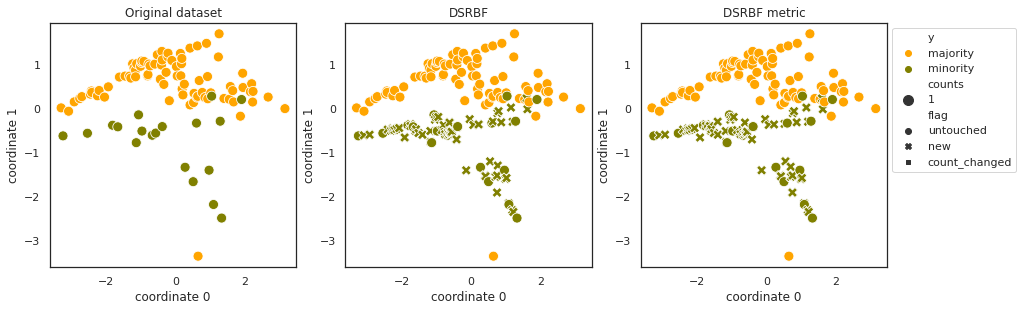

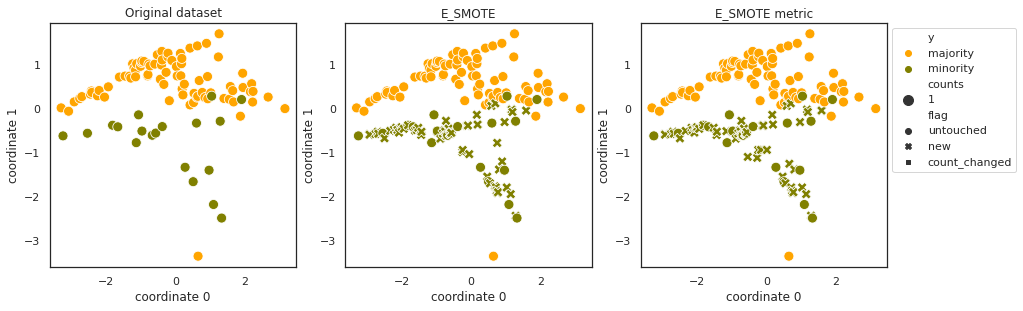

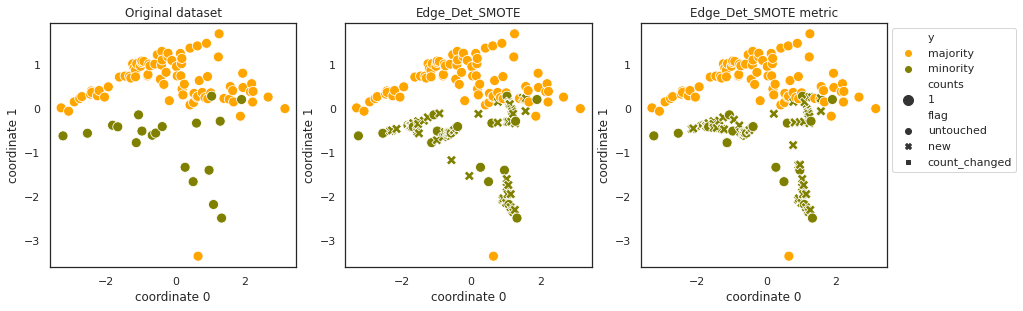

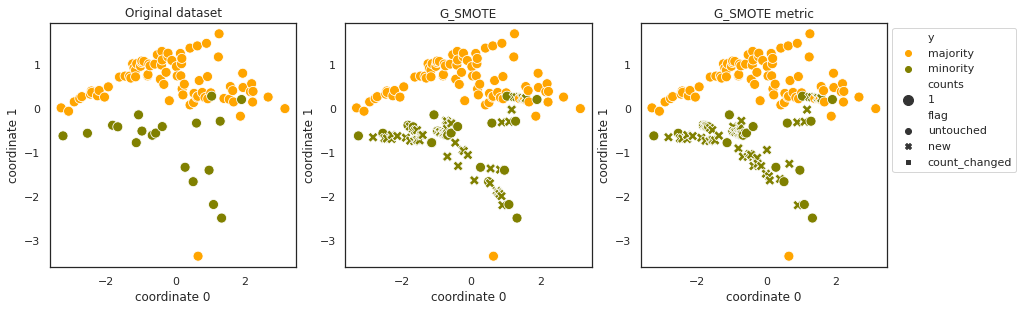

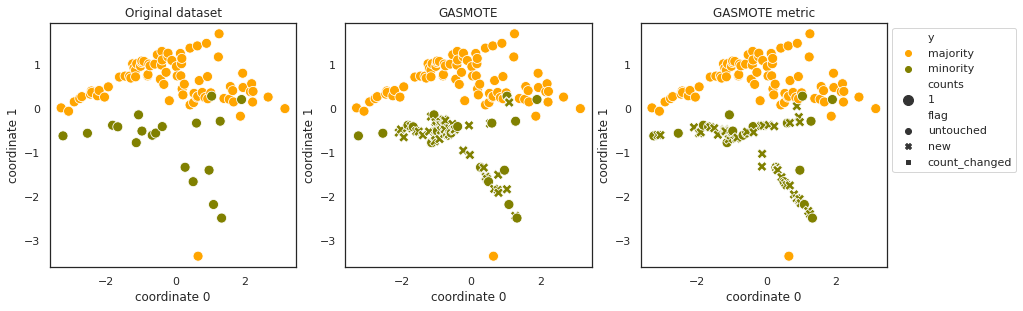

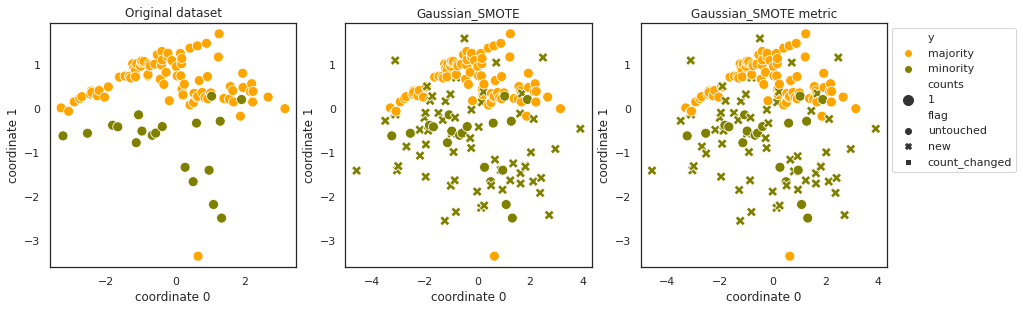

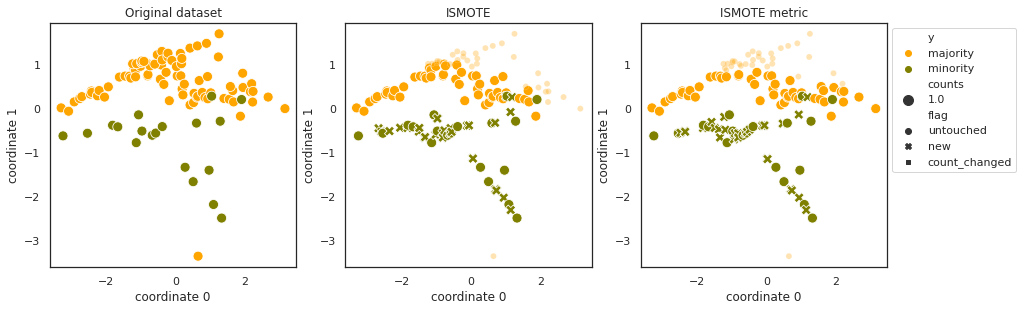

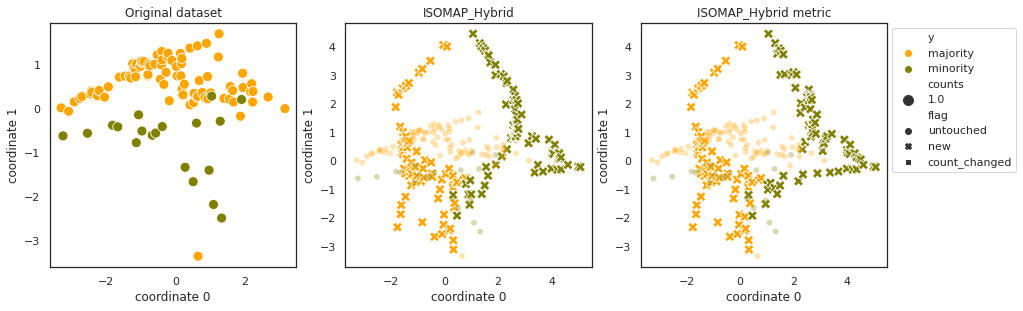

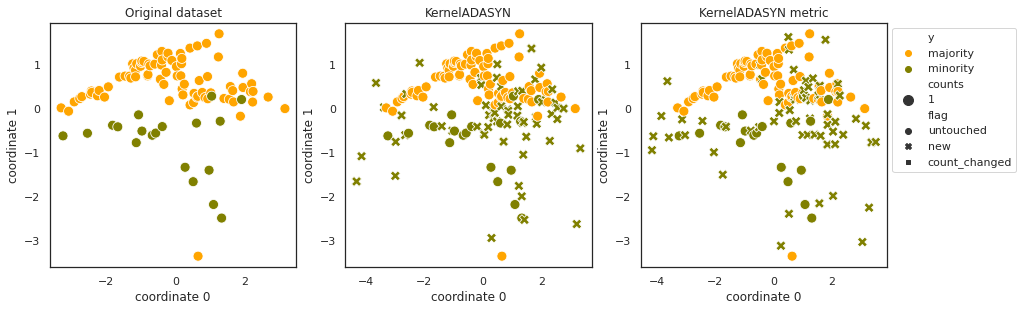

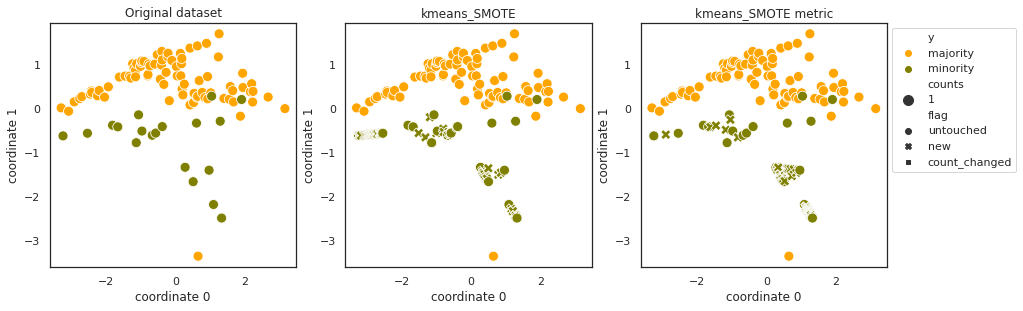

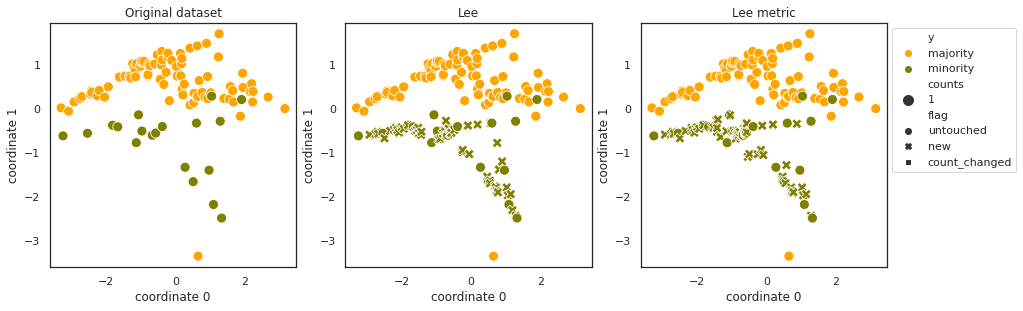

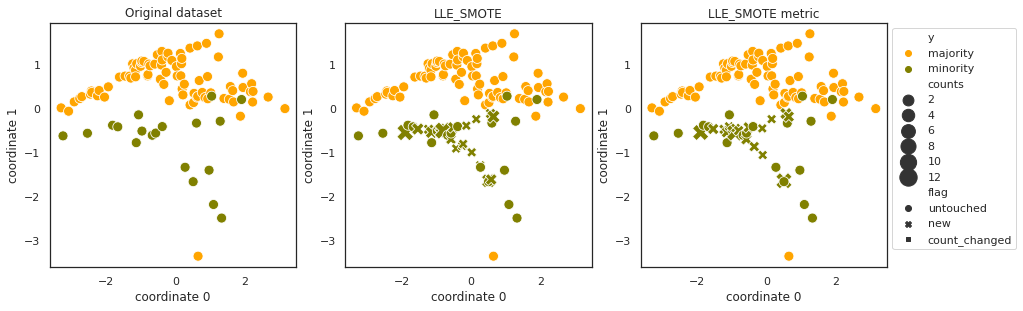

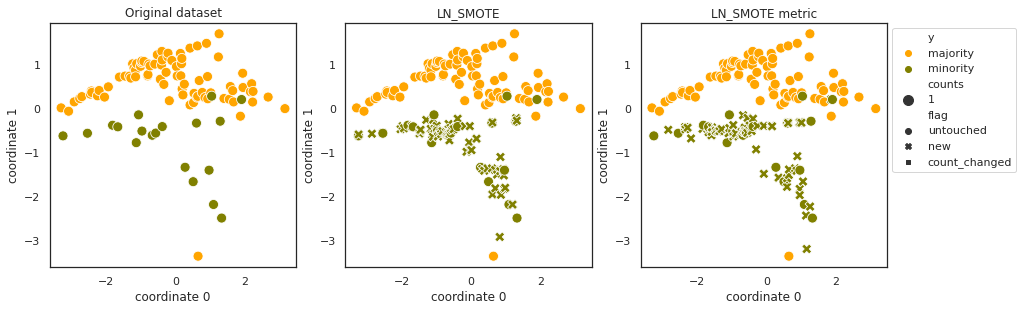

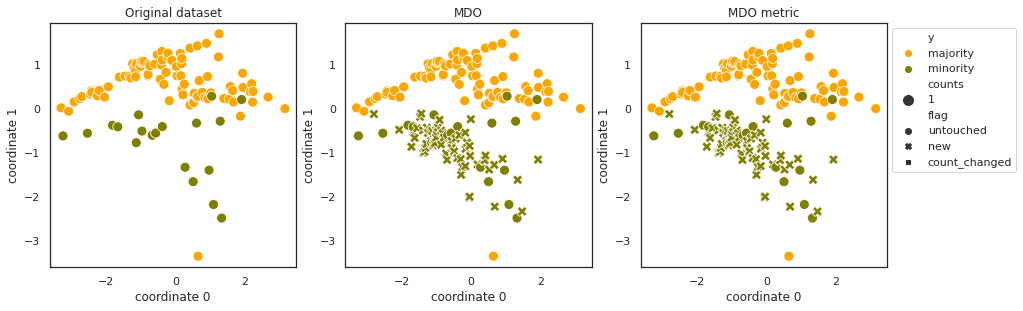

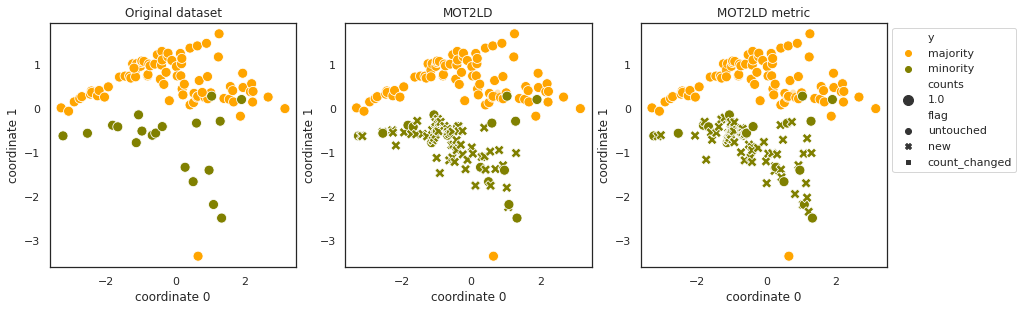

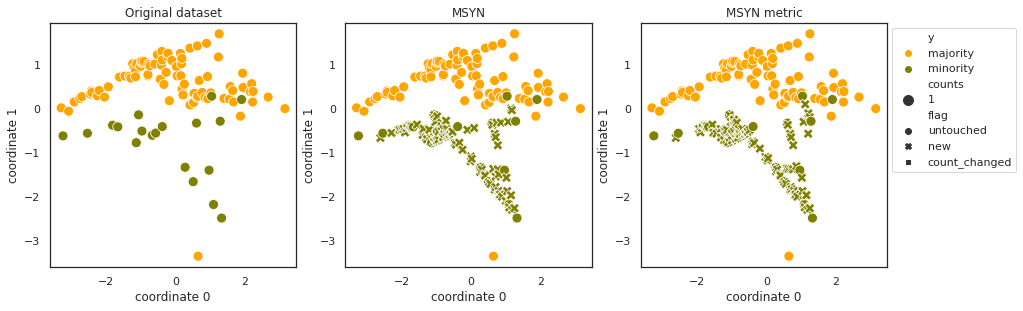

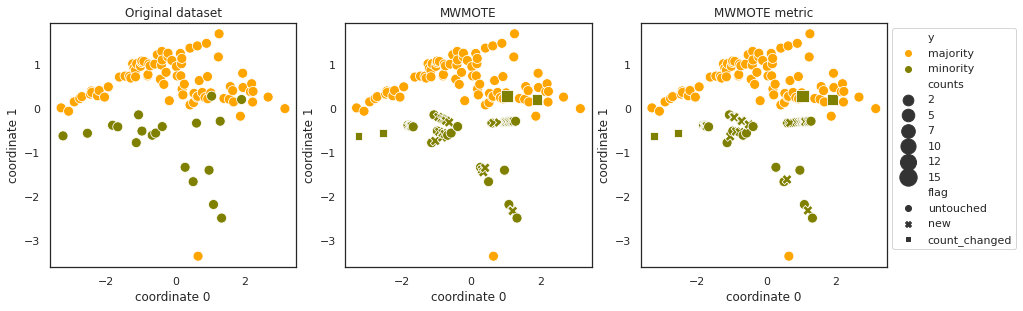

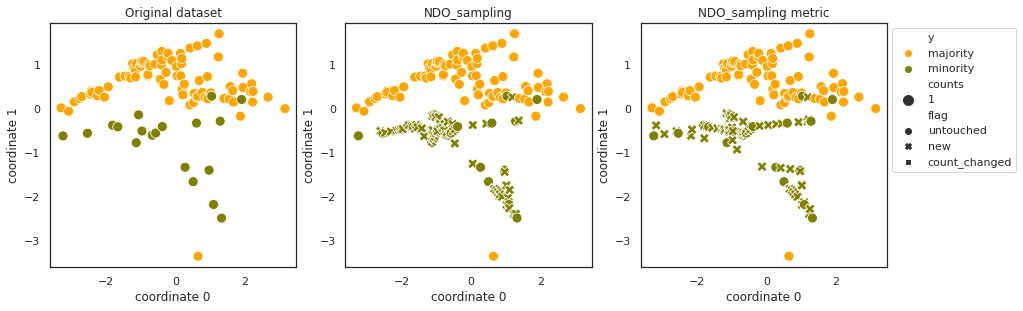

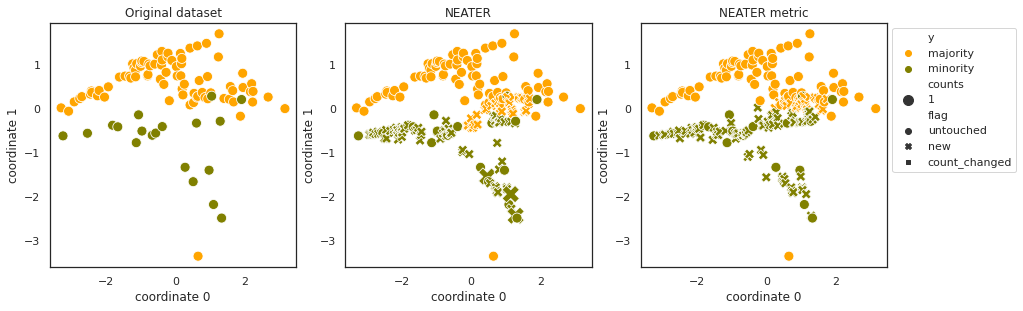

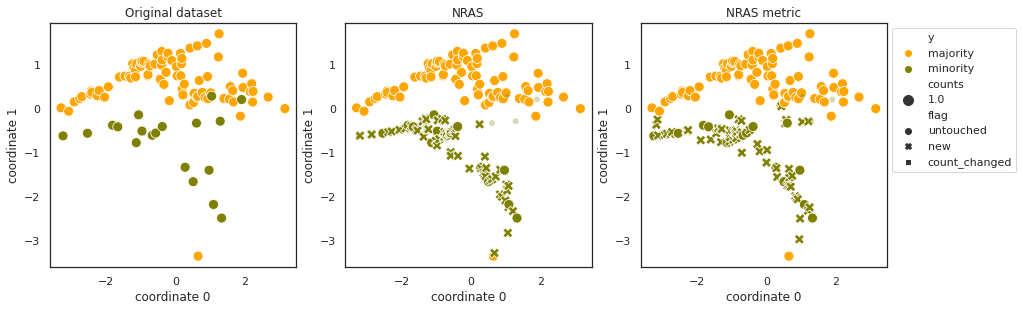

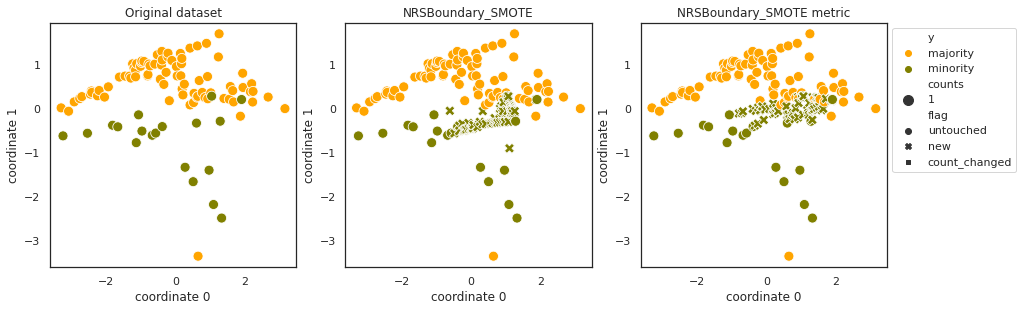

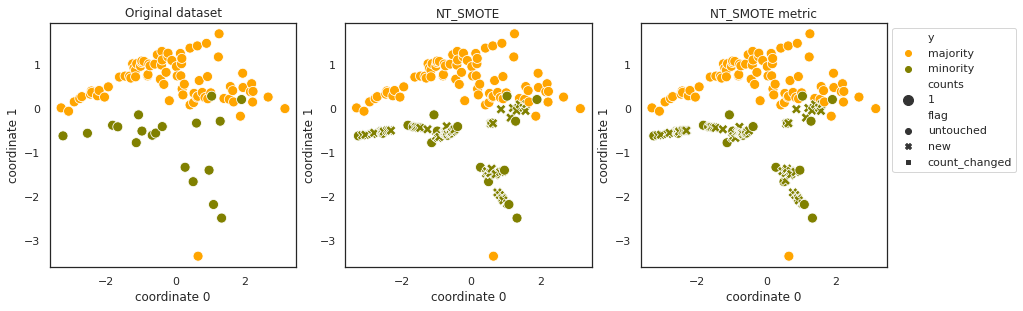

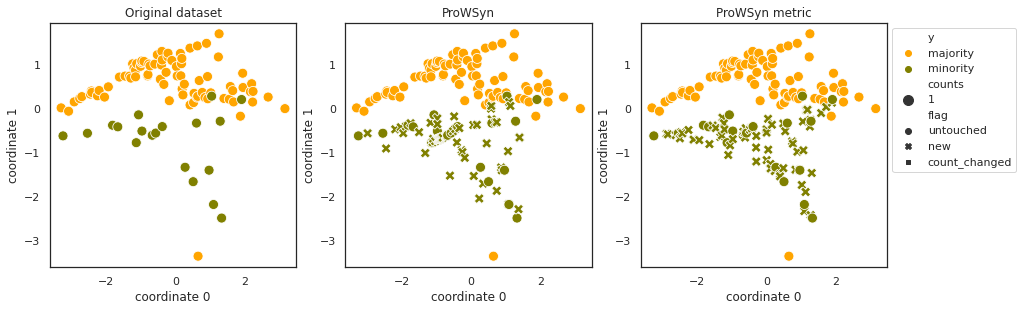

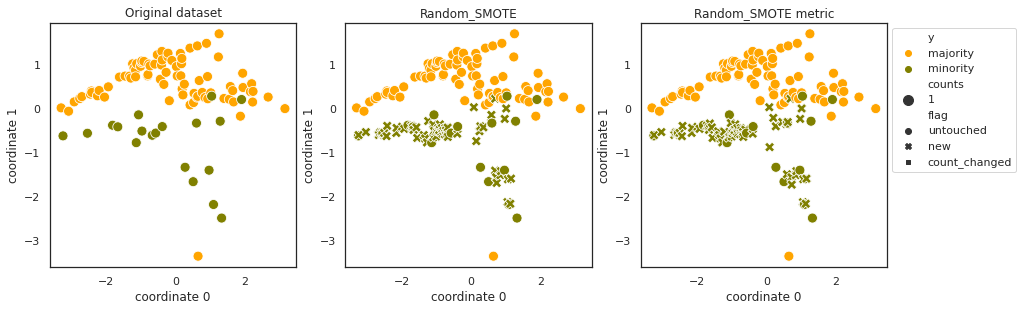

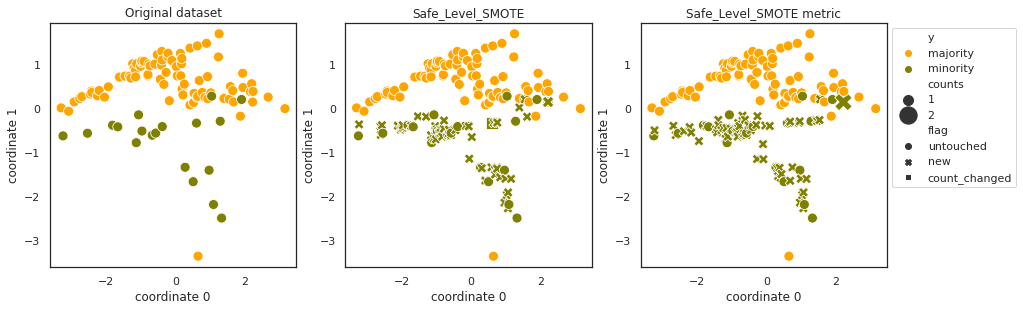

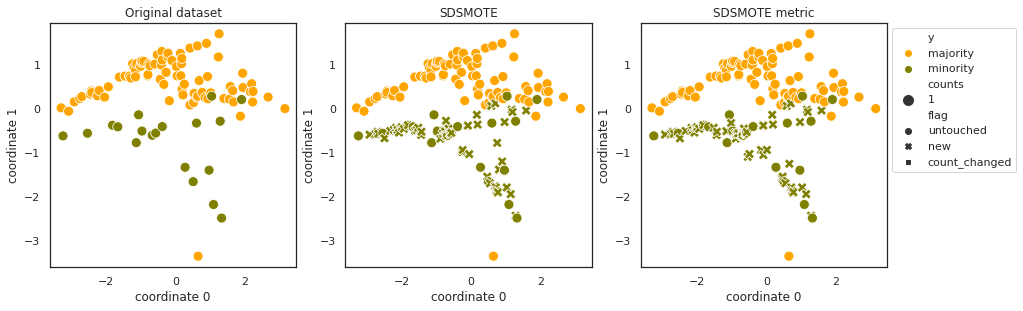

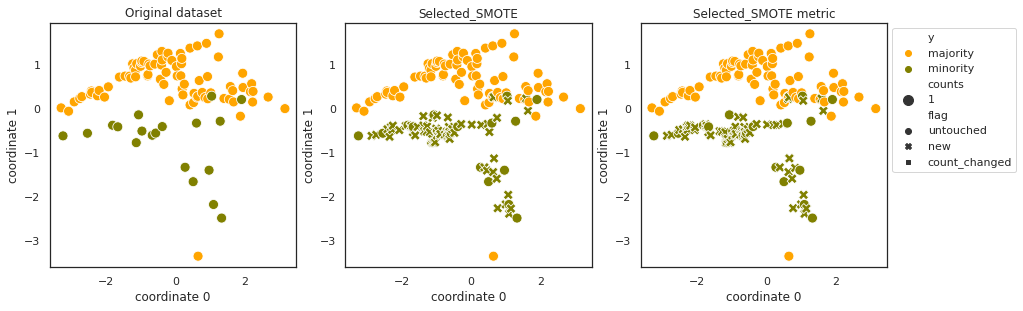

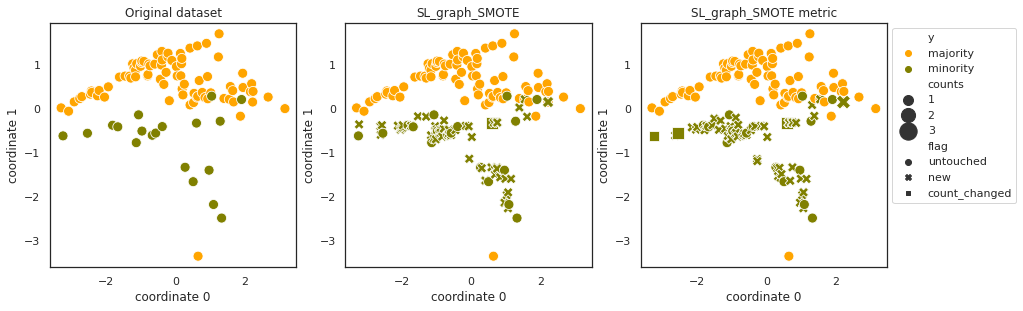

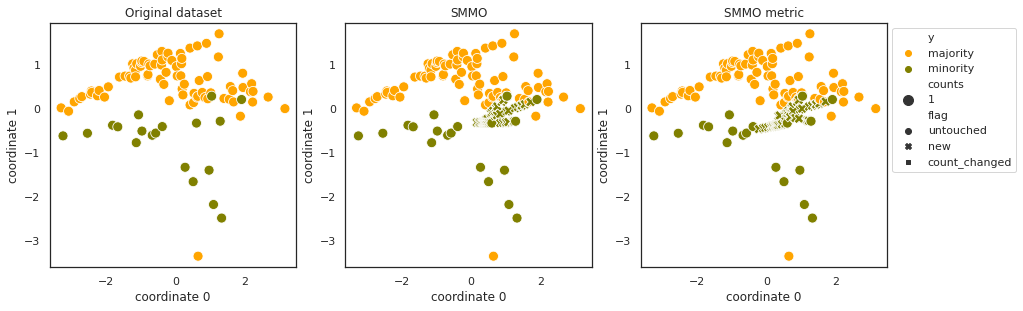

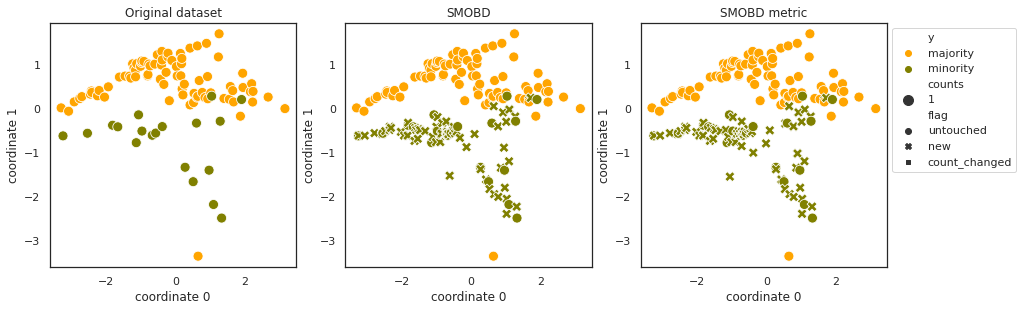

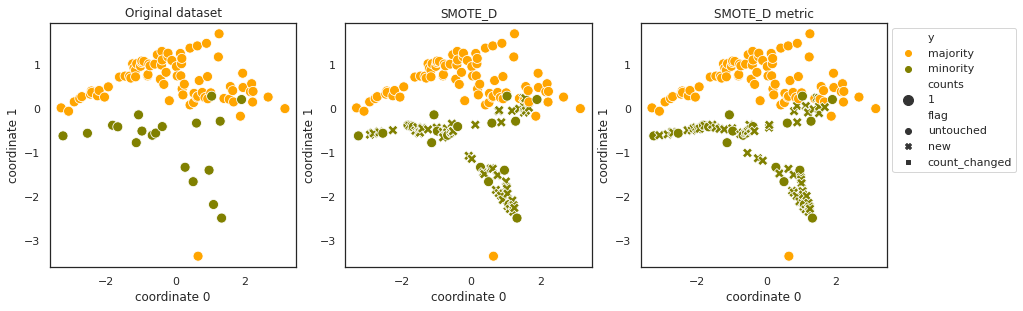

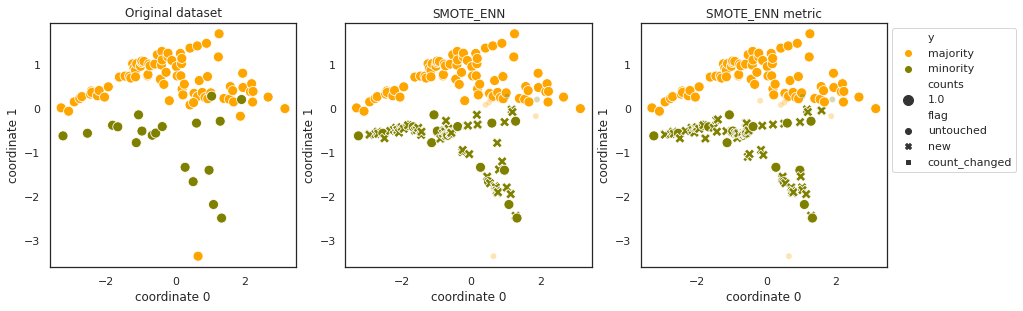

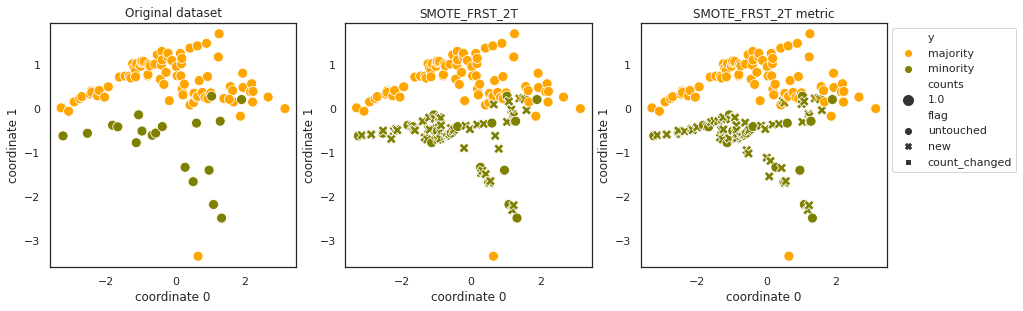

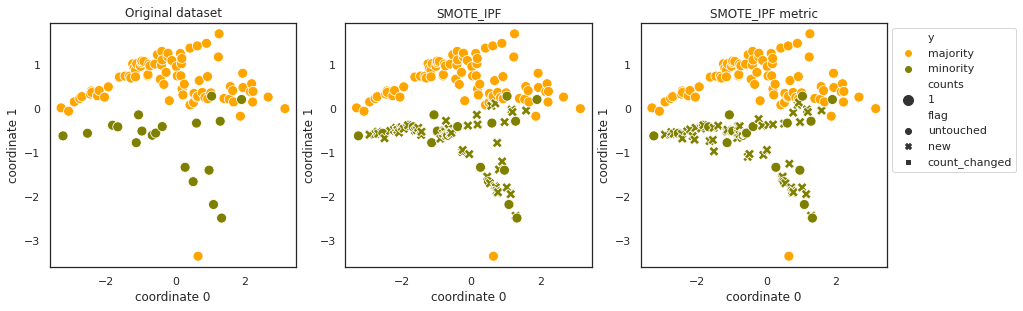

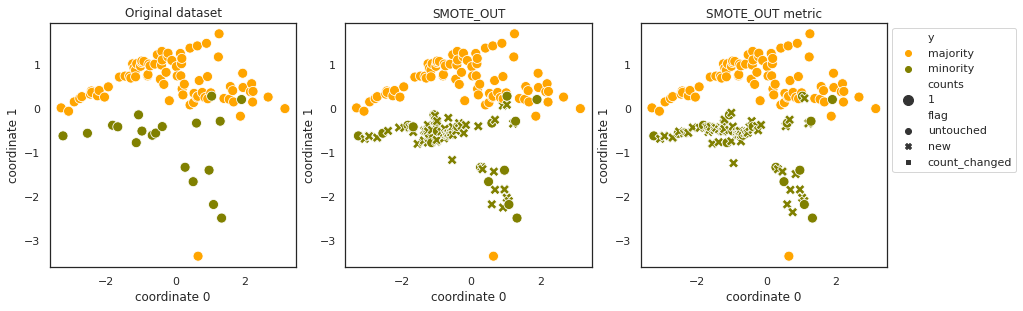

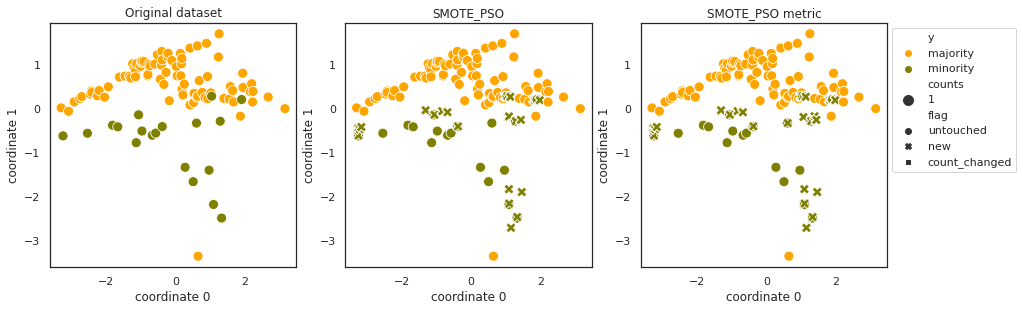

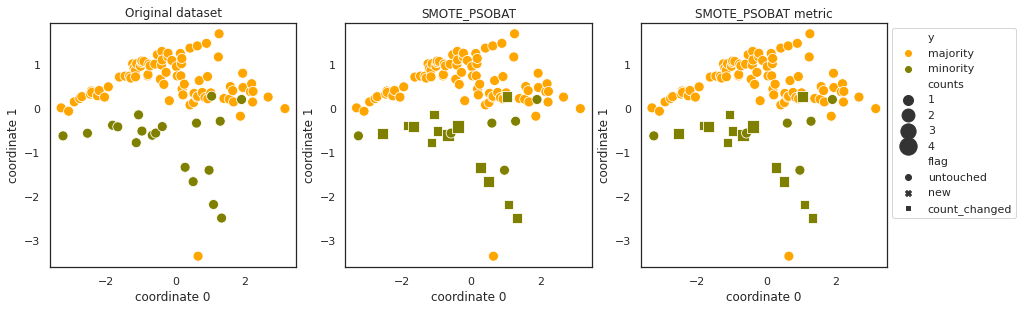

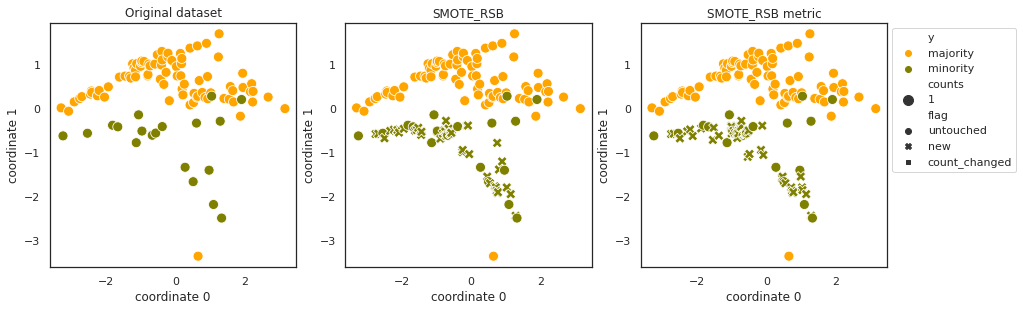

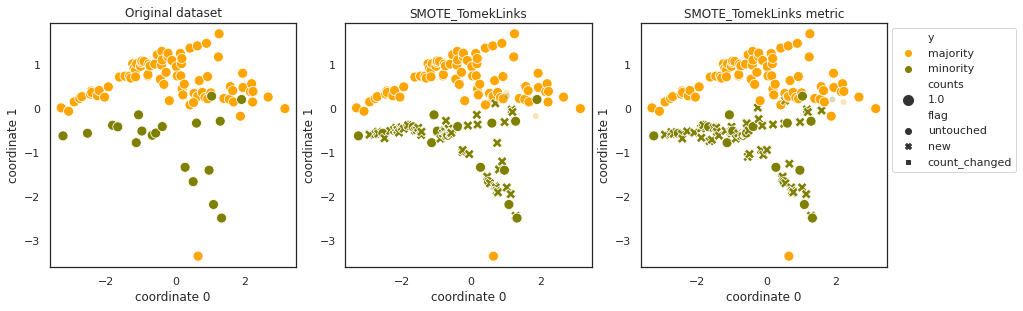

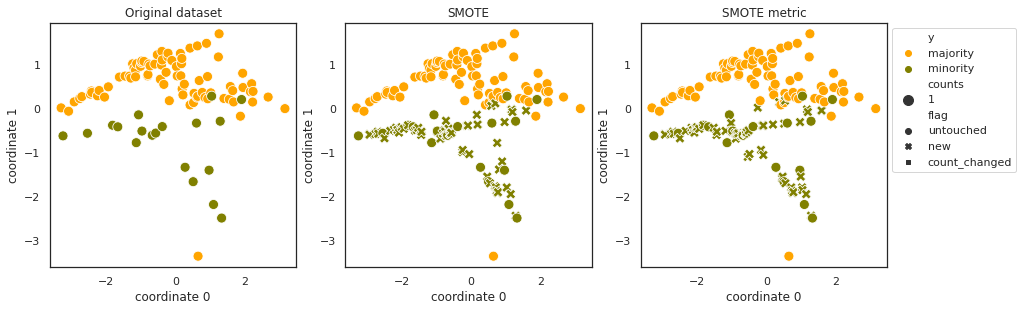

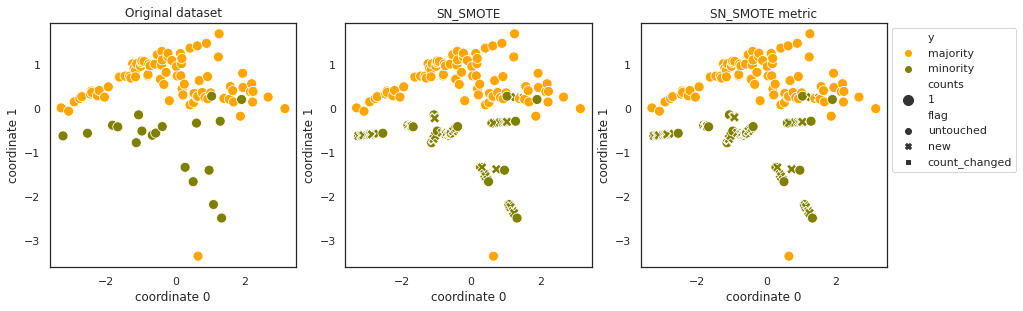

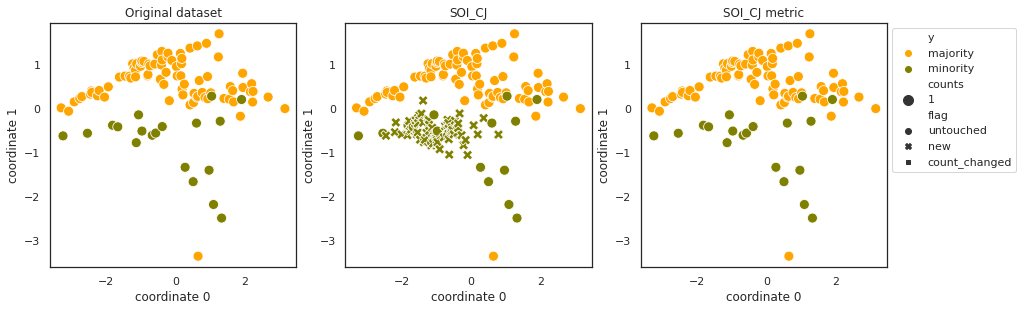

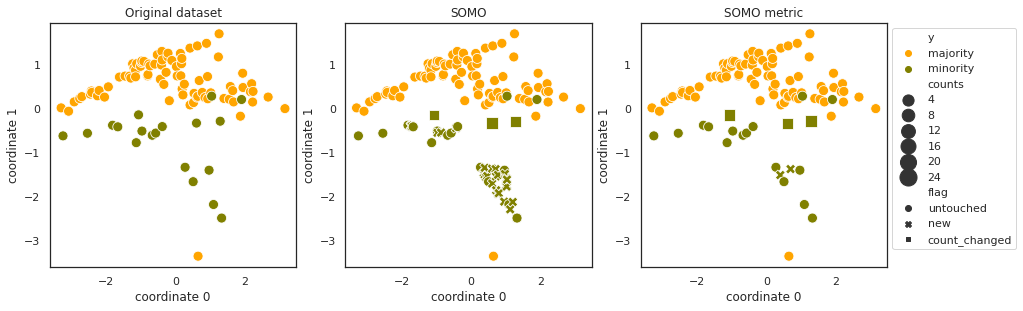

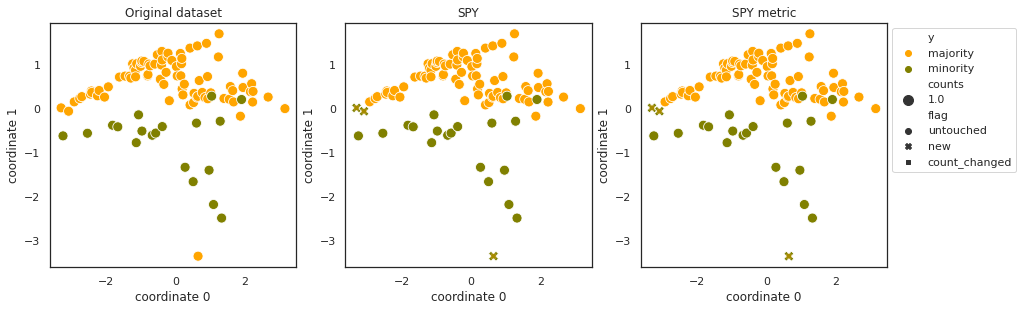

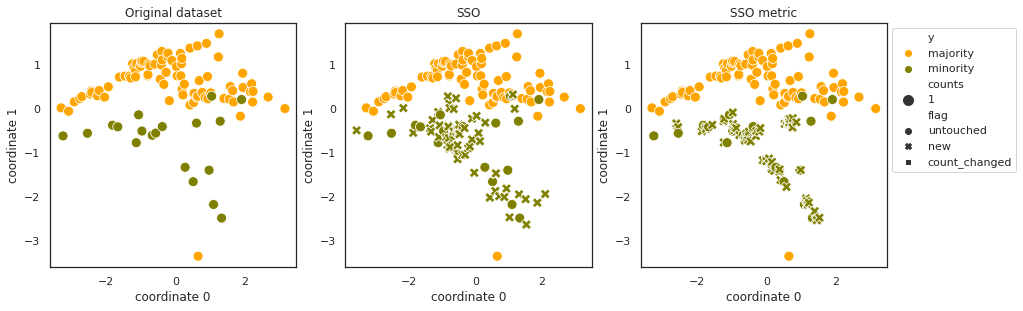

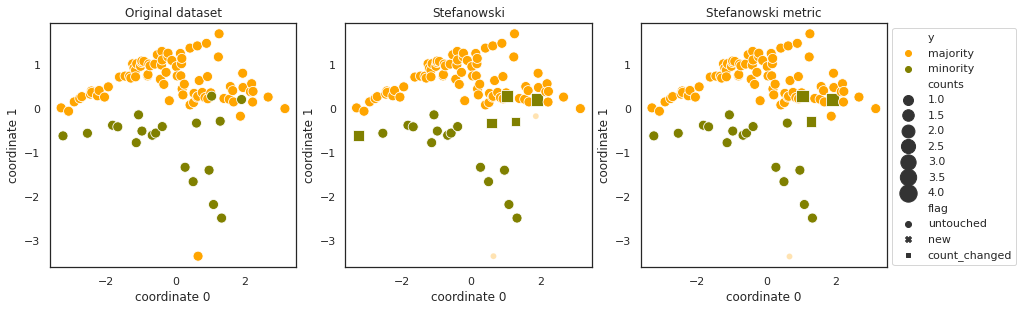

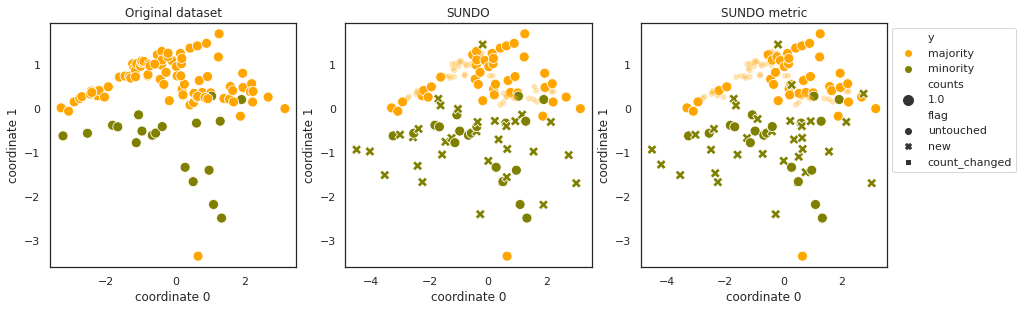

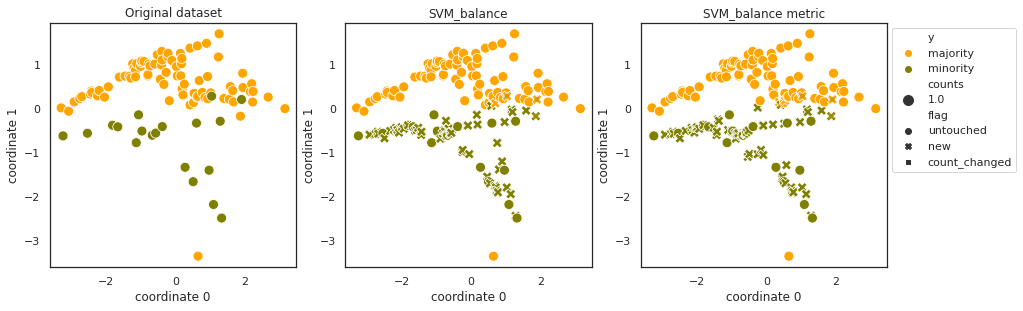

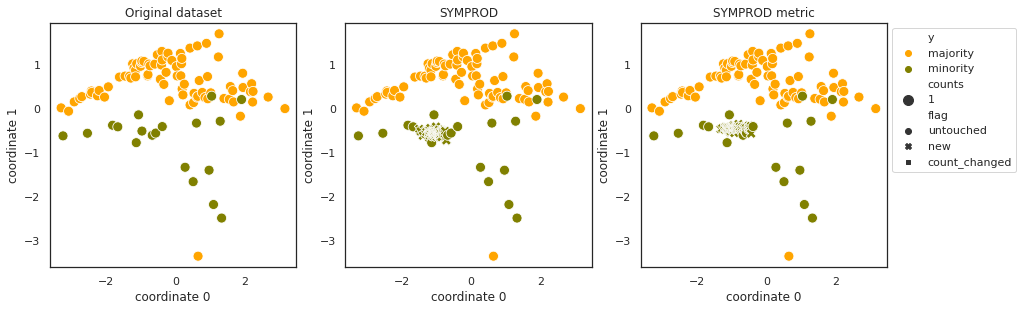

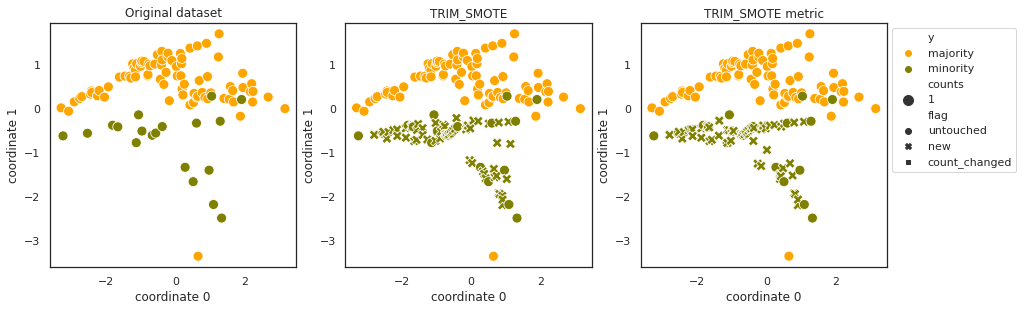

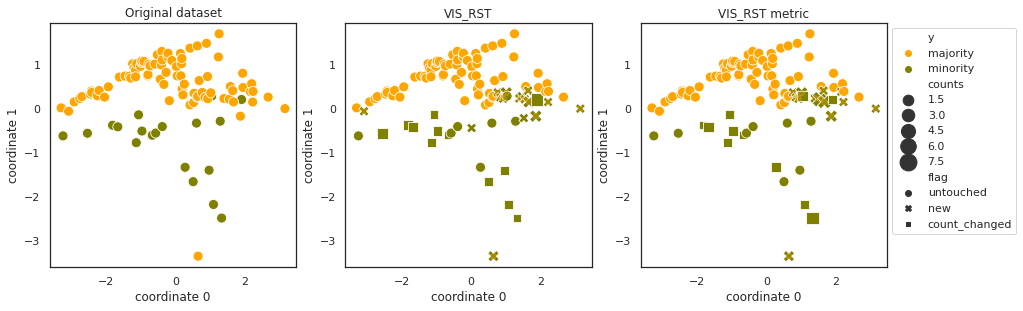

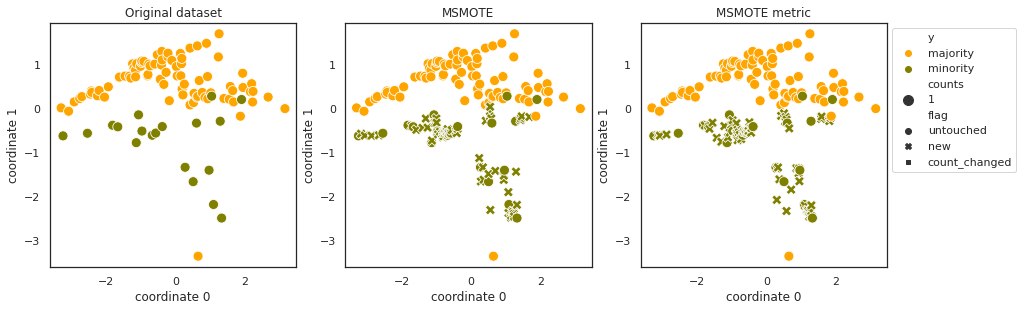

In [6]:
for o in oversamplers_metric:
    oversampler_vanilla= o(random_state=21)
    X_samp, y_samp= oversampler_vanilla.sample(X, y)

    oversampler_metric= o(random_state=21, nn_params={'metric': 'precomputed',
                                                        'metric_learning_method': 'ITML'})
    X_samp_metric, y_samp_metric= oversampler_metric.sample(X, y)

    _ = plot_comparison_raw(X=X, y=y, 
                        X_samp0=X_samp, 
                        y_samp0=y_samp, 
                        X_samp1=X_samp_metric, 
                        y_samp1=y_samp_metric, 
                        title0=oversampler_vanilla.__class__.__name__, 
                        title1=oversampler_vanilla.__class__.__name__ + ' ' + 'metric')
    plt.show()